*Finite Element Method*


In [1]:
#@title (a) Escriba un programa que permita obtener la solución $U$ dado $f$ .

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Definición de f(x) y solución exacta
def f(x):
    return np.sin(2 * np.pi * x)

def u_exact(x):
    return np.sin(2 * np.pi * x) / (4 * np.pi ** 2)

def solve_poisson(f, m):
    """
    Resuelve -u'' = f(x) en (0,1) con u(0)=u(1)=0
    usando diferencias finitas centrales.
    """
    h = 1 / (m + 1)
    x = np.linspace(0, 1, m + 2)       # incluye los extremos
    rhs = f(x[1:-1])                   # valores interiores

    # Matriz tridiagonal (formato ralo)
    diagonals = [-np.ones(m - 1), 2*np.ones(m), -np.ones(m - 1)]
    A = diags(diagonals, offsets=[-1, 0, 1], format="csr") / h**2

    # Resolución del sistema lineal
    U = spsolve(A, rhs)

    # Agregar los valores de borde (u(0)=u(1)=0)
    U_full = np.concatenate(([0], U, [0]))
    return x, U_full


x	 U_num 	 	 U_exact 	 error
0.000	0.000000	0.000000	0.00e+00
0.091	0.014073	0.013695	3.78e-04
0.182	0.023678	0.023041	6.37e-04
0.273	0.025765	0.025072	6.93e-04
0.364	0.019672	0.019143	5.29e-04
0.455	0.007334	0.007136	1.97e-04
0.545	-0.007334	-0.007136	1.97e-04
0.636	-0.019672	-0.019143	5.29e-04
0.727	-0.025765	-0.025072	6.93e-04
0.818	-0.023678	-0.023041	6.37e-04
0.909	-0.014073	-0.013695	3.78e-04
1.000	0.000000	-0.000000	6.20e-18


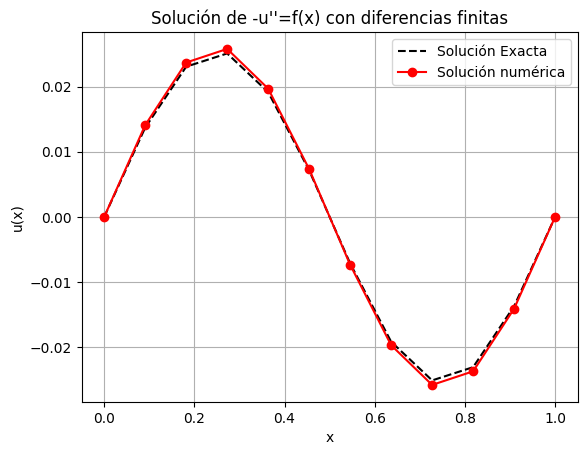